


https://www.econometrics-with-r.org/10-1-panel-data.html

In [2]:
install.packages("plm")

Installing package into 'C:/Users/oldyu/R/win-library/3.5'
(as 'lib' is unspecified)


package 'plm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\oldyu\AppData\Local\Temp\RtmpYXkwGS\downloaded_packages


In [3]:
library(AER)
library(plm)
library(stargazer)

Loading required package: Formula

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [4]:
# load the package and the dataset
library(AER)
data(Fatalities)

In [5]:
# obtain the dimension and inspect the structure
is.data.frame(Fatalities)

[1] TRUE

In [6]:
dim(Fatalities)

[1] 336  34

In [7]:
str(Fatalities)

'data.frame':	336 obs. of  34 variables:
 $ state       : Factor w/ 48 levels "al","az","ar",..: 1 1 1 1 1 1 1 2 2 2 ...
 $ year        : Factor w/ 7 levels "1982","1983",..: 1 2 3 4 5 6 7 1 2 3 ...
 $ spirits     : num  1.37 1.36 1.32 1.28 1.23 ...
 $ unemp       : num  14.4 13.7 11.1 8.9 9.8 ...
 $ income      : num  10544 10733 11109 11333 11662 ...
 $ emppop      : num  50.7 52.1 54.2 55.3 56.5 ...
 $ beertax     : num  1.54 1.79 1.71 1.65 1.61 ...
 $ baptist     : num  30.4 30.3 30.3 30.3 30.3 ...
 $ mormon      : num  0.328 0.343 0.359 0.376 0.393 ...
 $ drinkage    : num  19 19 19 19.7 21 ...
 $ dry         : num  25 23 24 23.6 23.5 ...
 $ youngdrivers: num  0.212 0.211 0.211 0.211 0.213 ...
 $ miles       : num  7234 7836 8263 8727 8953 ...
 $ breath      : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ jail        : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 2 2 2 ...
 $ service     : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 2 2 2 ...
 $ fatal       : int  839

In [8]:
# list the first few observations
head(Fatalities)

state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,drinkage,...,nfatal2124,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp
al,1982,1.37,14.4,10544.15,50.69204,1.539379,30.3557,0.32829,19.00,...,32,309.438,3942002,208999.6,221553.4,290000.1,28516,9.7,57.8,-0.02212476
al,1983,1.36,13.7,10732.80,52.14703,1.788991,30.3336,0.34341,19.00,...,35,341.834,3960008,202000.1,219125.5,290000.2,31032,9.6,57.9,0.04655825
al,1984,1.32,11.1,11108.79,54.16809,1.714286,30.3115,0.35924,19.00,...,34,304.872,3988992,197000.0,216724.1,288000.2,32961,7.5,59.5,0.06279784
al,1985,1.28,8.9,11332.63,55.27114,1.652542,30.2895,0.37579,19.67,...,45,276.742,4021008,194999.7,214349.0,284000.3,35091,7.2,60.1,0.02748997
al,1986,1.23,9.8,11661.51,56.51450,1.609907,30.2674,0.39311,21.00,...,29,360.716,4049994,203999.9,212000.0,263000.3,36259,7.0,60.7,0.03214295
al,1987,1.18,7.8,11944.00,57.50988,1.560000,30.2453,0.41123,21.00,...,30,368.421,4082999,204999.8,208998.5,258999.8,37426,6.2,61.5,0.04897637


In [9]:
# summarize the variables 'state' and 'year'
summary(Fatalities[, c(1, 2)])

     state       year   
 al     :  7   1982:48  
 az     :  7   1983:48  
 ar     :  7   1984:48  
 ca     :  7   1985:48  
 co     :  7   1986:48  
 ct     :  7   1987:48  
 (Other):294   1988:48  

In [10]:
# define the fatality rate
Fatalities$fatal_rate <- Fatalities$fatal / Fatalities$pop * 10000

# subset the data
Fatalities1982 <- subset(Fatalities, year == "1982")
Fatalities1988 <- subset(Fatalities, year == "1988")

In [11]:
# estimate simple regression models using 1982 and 1988 data
fatal1982_mod <- lm(fatal_rate ~ beertax, data = Fatalities1982)
fatal1988_mod <- lm(fatal_rate ~ beertax, data = Fatalities1988)

coeftest(fatal1982_mod, vcov. = vcovHC, type = "HC1")


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.01038    0.14957 13.4408   <2e-16 ***
beertax      0.14846    0.13261  1.1196   0.2687    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [12]:
coeftest(fatal1988_mod, vcov. = vcovHC, type = "HC1")


t test of coefficients:

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  1.85907    0.11461 16.2205 < 2.2e-16 ***
beertax      0.43875    0.12786  3.4314  0.001279 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


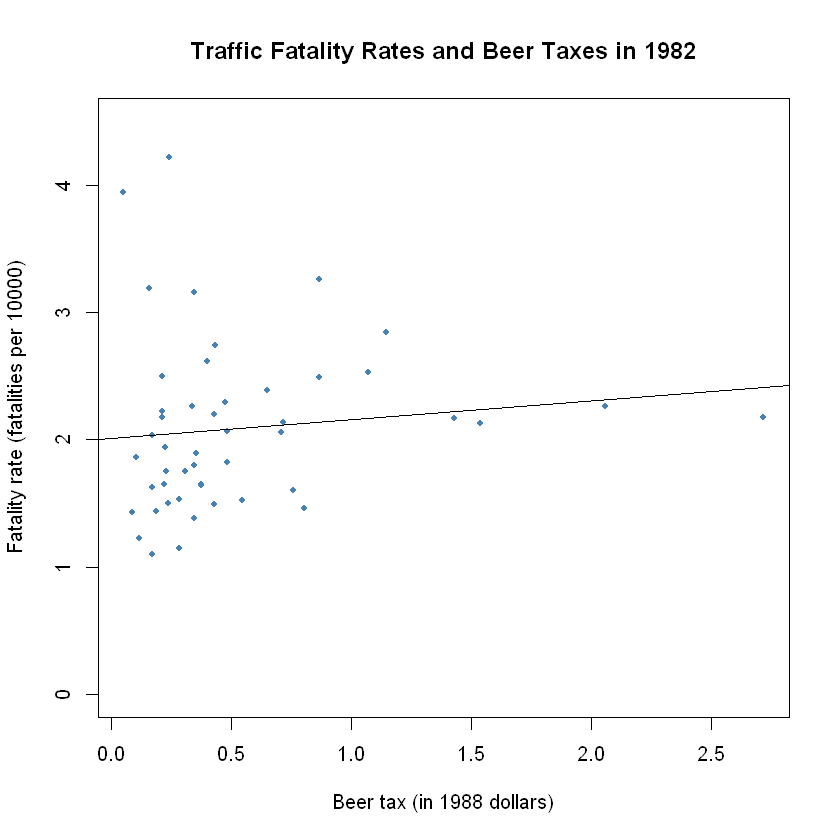

In [13]:
# plot the observations and add the estimated regression line for 1982 data
plot(x = Fatalities1982$beertax, 
     y = Fatalities1982$fatal_rate, 
     xlab = "Beer tax (in 1988 dollars)",
     ylab = "Fatality rate (fatalities per 10000)",
     main = "Traffic Fatality Rates and Beer Taxes in 1982",
     ylim = c(0, 4.5),
     pch = 20, 
     col = "steelblue")

abline(fatal1982_mod, lwd = 1.5)

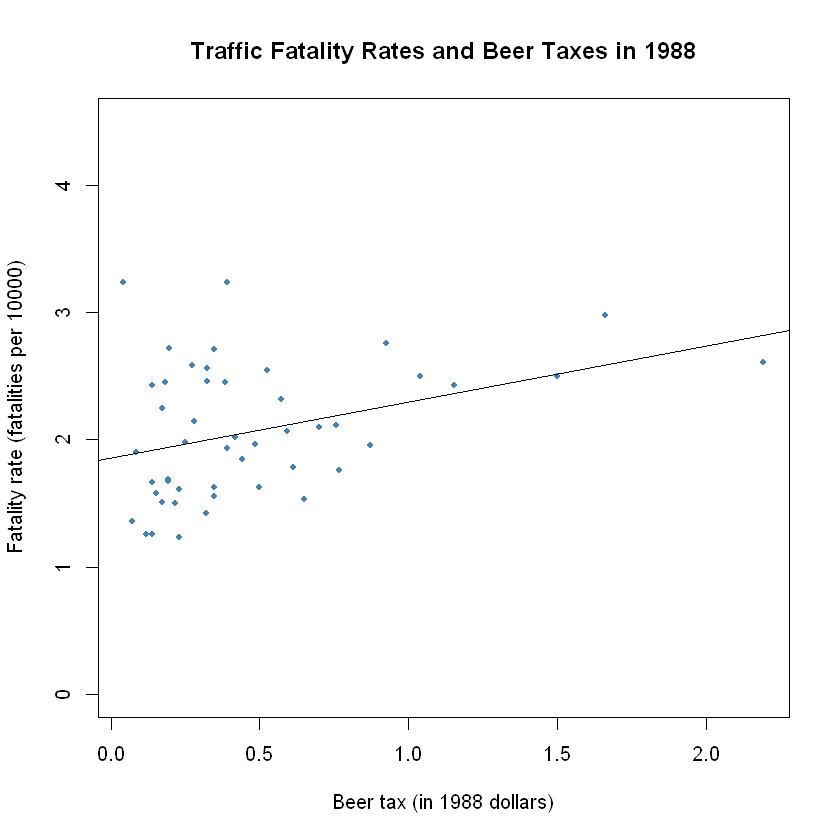

In [14]:
# plot observations and add estimated regression line for 1988 data
plot(x = Fatalities1988$beertax, 
     y = Fatalities1988$fatal_rate, 
     xlab = "Beer tax (in 1988 dollars)",
     ylab = "Fatality rate (fatalities per 10000)",
     main = "Traffic Fatality Rates and Beer Taxes in 1988",
     ylim = c(0, 4.5),
     pch = 20, 
     col = "steelblue")

abline(fatal1988_mod, lwd = 1.5)

In both plots, each point represents observations of beer tax and fatality rate for a given state in the respective year. The regression results indicate a positive relationship between the beer tax and the fatality rate for both years. The estimated coefficient on beer tax for the 1988 data is almost three times as large as for the 1988 data set. This is contrary to our expectations: alcohol taxes are supposed to lower the rate of traffic fatalities. As we known from Chapter 6, this is possibly due to omitted variable bias, since both models do not include any covariates, e.g., economic conditions. This could be corrected for using a multiple regression approach. However, this cannot account for omitted unobservable factors that differ from state to state but can be assumed to be constant over the observation span, e.g., the populations’ attitude towards drunk driving. As shown in the next section, panel data allow us to hold such factors constant.